Classification on a simple dataset.

We can generate the dataset with:

In [1]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int64


As we can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

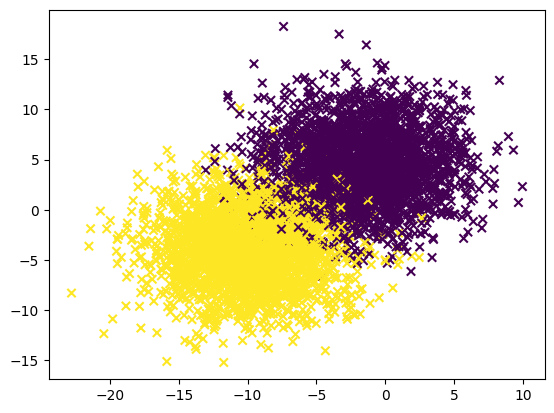

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. The tasks we are performing in this notebook are:

- Add and adapt regression code (using numpy, not sklearn), so that it can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Additional Task: we will see that classification splits the dataset at a specific line between the two clusters. Calculating the formula for this line and ploting it as a line using matplotlib.
- After we have done the iris classification, print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
-Generate the precision-recall curve manually.

## Solution

Matrix Formula of Linear Regression

In [5]:
import numpy as np

ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]

X_mat = np.matrix(X_)
y_mat = np.matrix(y).reshape(-1, 1)

print(X_mat.shape)
print(y_mat.shape)

weights = ((X_mat.T @ X_mat).I @ X_mat.T) @ y_mat
print(weights.shape)

predictions = X_mat @ weights
residuals = y - predictions

print("MSE:", np.mean(np.power(residuals, 2)))

(5000, 3)
(5000, 1)
(3, 1)
MSE: 0.4374445990096903


In [6]:
np.set_printoptions(suppress=True, precision=4, floatmode='fixed')
print(np.asarray(predictions[:10]).reshape(-1))
print(y[:10])

[ 0.9946 -0.0011  0.1068  0.5395  1.0677  1.2960  0.3501  0.0926  0.6159
  0.7921]
[1 0 0 1 1 1 0 0 1 1]


Classification 

In [7]:
threshold = 0.5
binary_classification = (predictions >= threshold).astype(int)
binary_classification = np.asarray(binary_classification).reshape(-1)
print(binary_classification[:10])
print(y[:10])

[1 0 0 1 1 1 0 0 1 1]
[1 0 0 1 1 1 0 0 1 1]


Plot

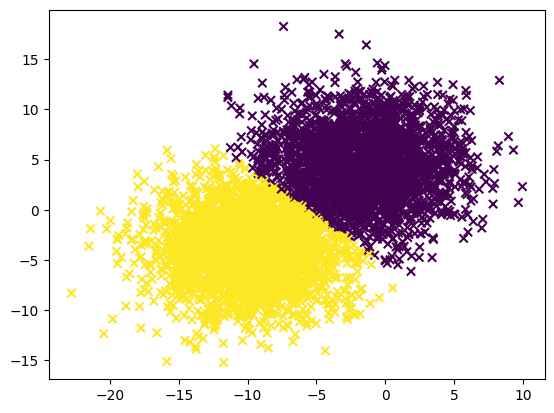

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=binary_classification)
plt.show()

Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $

Accuracy

In [9]:
accuracy = np.mean(binary_classification == y)
print("Accuracy:", accuracy)

Accuracy: 0.9586


Slope & Intercept of the line

In [10]:
weights = np.asarray(weights)
w1, w2 = weights[0], weights[1]
b = weights[2]

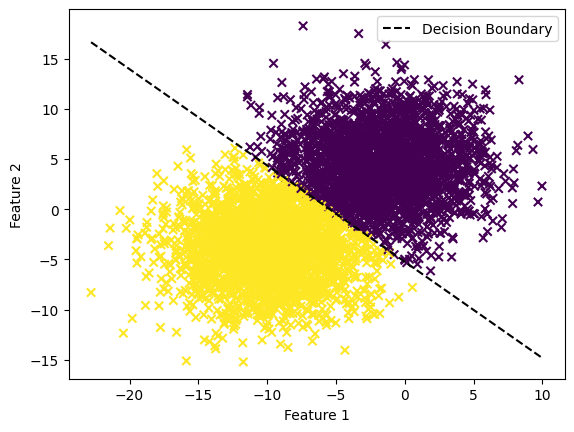

In [11]:
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# print(x1_vals.shape)
x2_vals = -(w1 / w2) * x1_vals + (b / w2) + threshold
x2_vals = x2_vals.reshape(-1)
# print(x2_vals.shape)

plt.scatter(X[:, 0], X[:, 1], marker="x", c=binary_classification)
plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Question: After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib

Classification report using sklearn

In [12]:
import sklearn
from sklearn.metrics import PrecisionRecallDisplay
print(sklearn.metrics.classification_report(y, binary_classification, digits=5))

              precision    recall  f1-score   support

           0    0.95842   0.95880   0.95861      2500
           1    0.95878   0.95840   0.95859      2500

    accuracy                        0.95860      5000
   macro avg    0.95860   0.95860   0.95860      5000
weighted avg    0.95860   0.95860   0.95860      5000



Precision Recall curve using sklearn

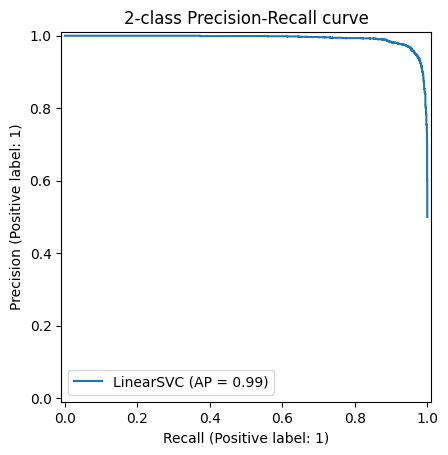

In [13]:
predictions = np.asarray(predictions)
display = PrecisionRecallDisplay.from_predictions(
    y, predictions, name="LinearSVC", plot_chance_level=False
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Manual Classification report for class1 (without sklearn)

In [14]:
true_positives = np.sum((y==1)& (binary_classification ==1))
true_negatives = np.sum((y==0)& (binary_classification ==0))
false_positives = np.sum((y==0)& (binary_classification ==1))
false_negatives = np.sum((y==1)& (binary_classification ==0))

In [15]:
precision = true_positives / (true_positives + false_positives) 
recall = true_positives / (true_positives + false_negatives) 
f1_score = 2 * (precision * recall) / (precision + recall) 

print("classification report for class 1")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1_score:.5f}")

classification report for class 1
Precision: 0.95878
Recall: 0.95840
F1-Score: 0.95859


Manual Classification report for class0 (without Sklearn)

In [16]:
true_positives = np.sum((y==0)& (binary_classification ==0))
true_negatives = np.sum((y==1)& (binary_classification ==1))
false_positives = np.sum((y==1)& (binary_classification ==0))
false_negatives = np.sum((y==0)& (binary_classification ==1))

In [17]:
precision = true_positives / (true_positives + false_positives) 
recall = true_positives / (true_positives + false_negatives) 
f1_score = 2 * (precision * recall) / (precision + recall) 

print("classification report for class 0")

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1_score:.5f}")

classification report for class 0
Precision: 0.95842
Recall: 0.95880
F1-Score: 0.95861


Manual Precision Recall curve (without sklearn)

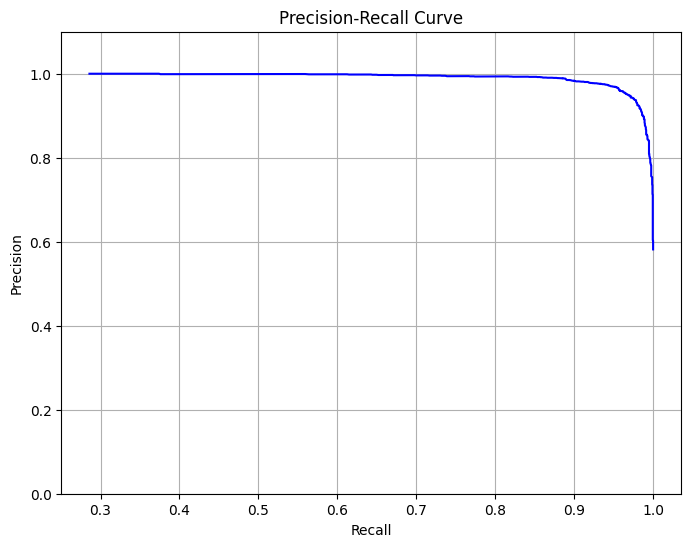

In [18]:
import numpy as np
import matplotlib.pyplot as plt

y_true = y
y_pred_prob = np.asarray(predictions).reshape(-1)

precisions = []
recalls = []

for threshold in np.linspace(0, 1, num=1001):  

    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)

    TP = np.sum((y == 1) & (y_pred_thresholded == 1))
    FP = np.sum((y == 0) & (y_pred_thresholded == 1))
    FN = np.sum((y == 1) & (y_pred_thresholded == 0))
    
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)
    
    precisions.append(precision)
    recalls.append(recall)

precisions = np.array(precisions)
recalls = np.array(recalls)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='b', label='Precision-Recall Curve')
plt.ylim((0,1.1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()